In [31]:
import pandas as pd

df = pd.read_csv('data/dataframe.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,"9,839.64",C1231006815,"170,136.00","160,296.36",M1979787155,0.00,0.00,0,0
1,1,PAYMENT,"1,864.28",C1666544295,"21,249.00","19,384.72",M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,"21,182.00",0.00,1,0
4,1,PAYMENT,"11,668.14",C2048537720,"41,554.00","29,885.86",M1230701703,0.00,0.00,0,0


In [32]:
print(df.info())
print()
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None



,count,mean,std,min,25%,50%,75%,max
step,"6,362,620.00",243.40,142.33,1.00,156.00,239.00,335.00,743.00
amount,"6,362,620.00","179,861.90","603,858.23",0.00,"13,389.57","74,871.94","208,721.48","92,445,516.64"
oldbalanceOrg,"6,362,620.00","833,883.10","2,888,242.67",0.00,0.00,"14,208.00","107,315.18","59,585,040.37"
newbalanceOrig,"6,362,620.00","855,113.67","2,924,048.50",0.00,0.00,0.00,"144,258.41","49,585,040.37"
oldbalanceDest,"6,362,620.00","1,100,701.67","3,399,180.11",0.00,0.00,"132,705.66","943,036.71","356,015,889.35"
newbalanceDest,"6,362,620.00","1,224,996.40","3,674,128.94",0.00,0.00,"214,661.44","1,111,909.25","356,179,278.92"
isFraud,"6,362,620.00",0.00,0.04,0.00,0.00,0.00,0.00,1.00
isFlaggedFraud,"6,362,620.00",0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [33]:
# On calcule le % de lignes vides par colonne
nan_counts = df.isnull().sum() / len(df) * 100

# On affiche les 20 colonnes les plus vides
print(nan_counts.sort_values(ascending=False).head(20))

step             0.00
type             0.00
amount           0.00
nameOrig         0.00
oldbalanceOrg    0.00
newbalanceOrig   0.00
nameDest         0.00
oldbalanceDest   0.00
newbalanceDest   0.00
isFraud          0.00
isFlaggedFraud   0.00
dtype: float64


Nombre de fraudes par type de transaction :
type
CASH_IN        0
CASH_OUT    4116
DEBIT          0
PAYMENT        0
TRANSFER    4097
Name: isFraud, dtype: int64


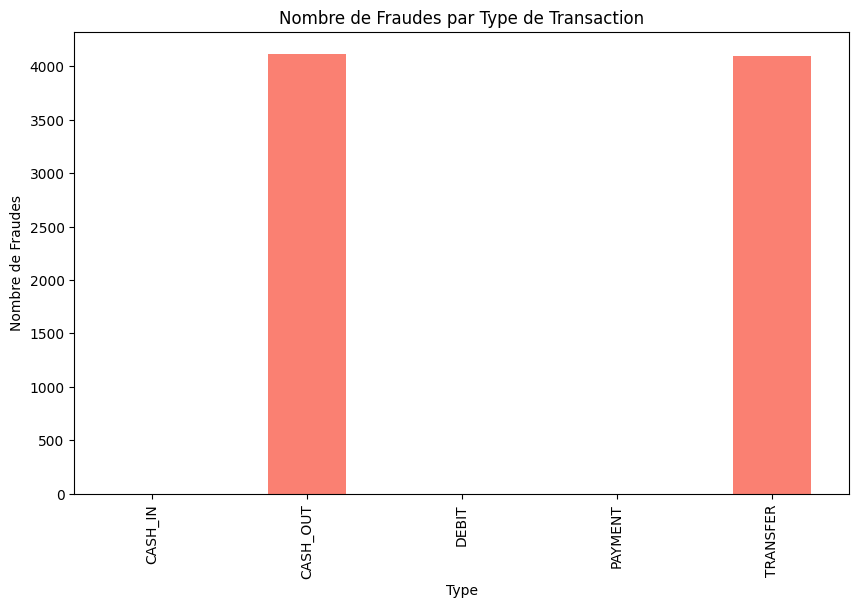

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# On groupe par 'type' et on calcule la somme des fraudes
fraud_by_type = df.groupby('type')['isFraud'].sum()

print("Nombre de fraudes par type de transaction :")
print(fraud_by_type)

# Visualisation pour ton rapport
plt.figure(figsize=(10, 6))
fraud_by_type.plot(kind='bar', color='salmon')
plt.title('Nombre de Fraudes par Type de Transaction')
plt.xlabel('Type')
plt.ylabel('Nombre de Fraudes')
plt.show()

c:\Users\jb_le\AppData\Local\Programs\Python\Python314\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


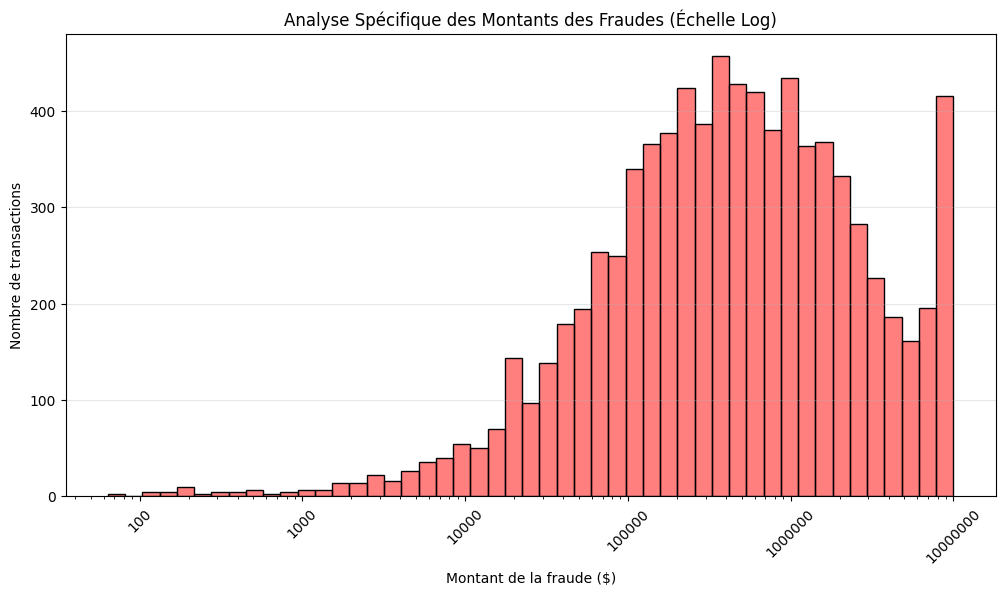

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# On filtre pour n'avoir que les fraudes
df_fraude = df[df['isFraud'] == 1]

plt.figure(figsize=(12, 6))

# Histogramme avec une couleur distincte (Rouge pour la fraude)
sns.histplot(df_fraude['amount'], kde=True, color='red', log_scale=True)

# Formatage de l'axe X pour que les chiffres soient lisibles
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.xaxis.get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)

plt.title('Analyse Spécifique des Montants des Fraudes (Échelle Log)')
plt.xlabel('Montant de la fraude ($)')
plt.ylabel('Nombre de transactions')
plt.grid(axis='y', alpha=0.3)

plt.show()

In [35]:
# 1. On filtre pour ne garder que les fraudes
df_fraud = df[df['isFraud'] == 1].copy()

# 2. On extrait la première lettre (C ou M) des noms
df_fraud['type_Orig'] = df_fraud['nameOrig'].str[0]
df_fraud['type_Dest'] = df_fraud['nameDest'].str[0]

# 3. On fait le GroupBy pour compter
print("Répartition des comptes à l'ORIGINE des fraudes :")
print(df_fraud.groupby('type_Orig').size())

print("\nRépartition des comptes à la DESTINATION des fraudes :")
print(df_fraud.groupby('type_Dest').size())

Répartition des comptes à l'ORIGINE des fraudes :
type_Orig
C    8213
dtype: int64

Répartition des comptes à la DESTINATION des fraudes :
type_Dest
C    8213
dtype: int64


In [37]:
# 1. On crée une liste des nameDest impliqués dans une fraude
fraud_dest_counts = df[df['isFraud'] == 1]['nameDest'].value_counts()

# 2. On affiche les comptes qui apparaissent le plus souvent comme receveurs de fraude
print("Comptes destinataires ayant reçu plusieurs fraudes :")
print(fraud_dest_counts[fraud_dest_counts > 1])

# 3. Pour aller plus loin : quel est le max de fraudes reçues par un seul compte ?
print(f"\nNombre maximum de fraudes reçues par un seul compte : {fraud_dest_counts.max()}")

Comptes destinataires ayant reçu plusieurs fraudes :
nameDest
C967226405     2
C1601170327    2
C650699445     2
C105660024     2
C1981613973    2
C803116137     2
C505532836     2
C964377943     2
C200064275     2
C1259079602    2
C1650668671    2
C385133759     2
C1656842502    2
C1185292292    2
C904300960     2
C2020337583    2
C1460854172    2
C1366192319    2
C2129197098    2
C644163395     2
C1497532505    2
C643624257     2
C475338087     2
C104038589     2
C1325541393    2
C1827219533    2
C1653587362    2
C1780714769    2
C668046170     2
C1013511446    2
C935310781     2
C185805228     2
C52390890      2
C1399829166    2
C410033330     2
C1827800010    2
C1148781766    2
C1837027614    2
C1980653895    2
C14138104      2
C1669818195    2
C1655359478    2
C1193568854    2
C686334805     2
Name: count, dtype: int64

Nombre maximum de fraudes reçues par un seul compte : 2


In [38]:
# On regarde le taux de fraude par compte destinataire
dest_stats = df.groupby('nameDest')['isFraud'].agg(['count', 'sum'])
dest_stats.columns = ['total_transactions', 'total_fraudes']

# On affiche les comptes qui ont reçu au moins 2 transactions et dont 100% sont des fraudes
comptes_suspects = dest_stats[(dest_stats['total_transactions'] > 1) & 
                              (dest_stats['total_transactions'] == dest_stats['total_fraudes'])]

print(f"Nombre de comptes ayant reçu plusieurs transactions, toutes frauduleuses : {len(comptes_suspects)}")

Nombre de comptes ayant reçu plusieurs transactions, toutes frauduleuses : 4
